In [1]:
#https://www.kaggle.com/sharmasanthosh/exploratory-study-on-ml-algorithms
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [9]:
train.dtypes

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cat10      object
cat11      object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cat19      object
cat20      object
cat21      object
cat22      object
cat23      object
cat24      object
cat25      object
cat26      object
cat27      object
cat28      object
cat29      object
           ...   
cat102     object
cat103     object
cat104     object
cat105     object
cat106     object
cat107     object
cat108     object
cat109     object
cat110     object
cat111     object
cat112     object
cat113     object
cat114     object
cat115     object
cat116     object
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    

In [11]:
train.shape,test.shape

((188318, 132), (125546, 131))

In [12]:
train['source']='train'
test['source']='test'
data=pd.concat([train,test],ignore_index=True)
data.head()

,cat1,cat10,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,...,cont3,cont4,cont5,cont6,cont7,cont8,cont9,id,loss,source
0,A,A,B,G,A,A,I,E,G,J,...,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,1,2213.18,train
1,A,B,L,F,A,A,E,E,I,K,...,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,2,1283.60,train
2,A,B,L,O,A,B,E,F,H,F,...,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,5,3005.09,train
3,B,A,I,D,A,A,E,E,I,K,...,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,10,939.85,train
4,A,B,F,J,A,A,D,E,K,G,...,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,11,2763.85,train


In [13]:
data.shape

(313864, 133)

In [16]:
list=data.apply(lambda x:sum(x.isnull()))

In [23]:
list.sort_values(ascending=False).head()

loss     125546
cat39         0
cat26         0
cat27         0
cat28         0
dtype: int64

In [44]:
ID = data['id']
data.drop('id',axis=1,inplace=True)
target=data['loss']

## Correlation and drop Identify Highly Correlated Features


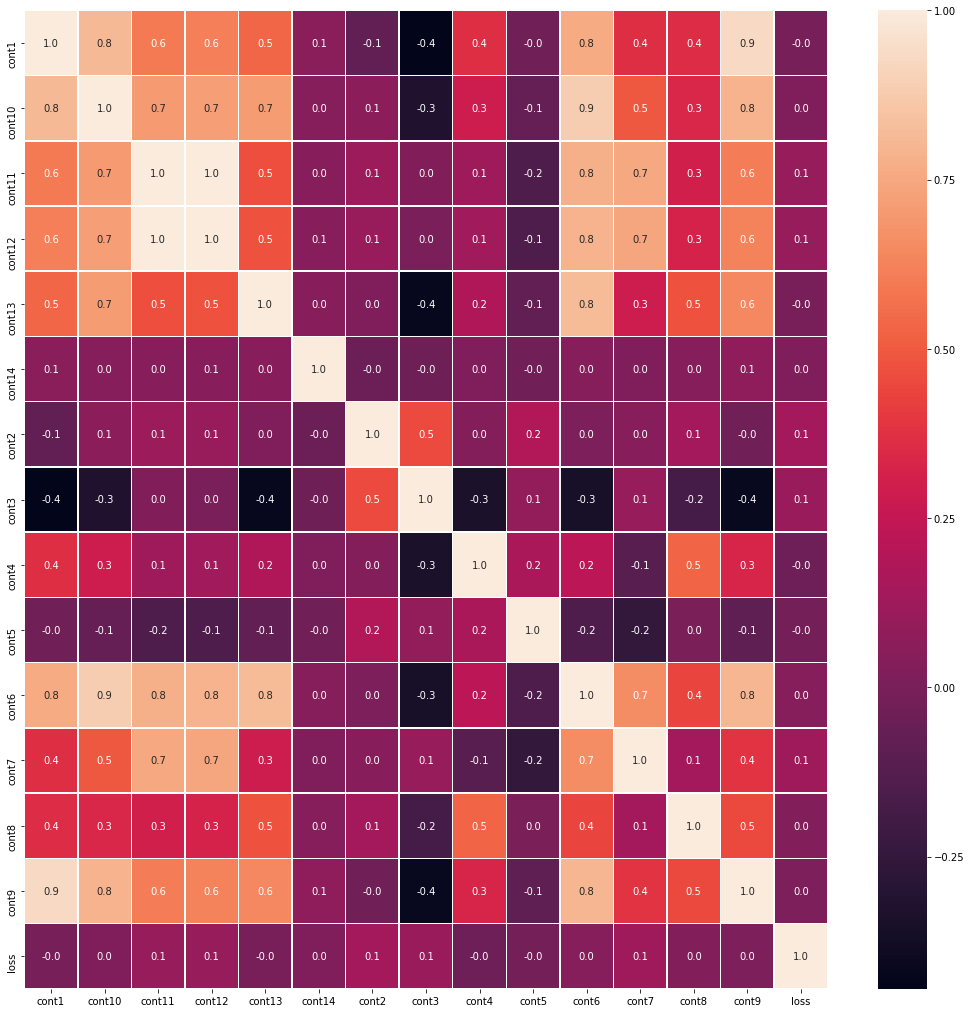

In [31]:
# correlation map
import seaborn as sns
import matplotlib.pyplot as plt
data_cont=data.iloc[:,116:]
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_cont.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

In [35]:
import numpy as np
corr_matrix = data_cont.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [36]:
to_drop

['cont10', 'cont12', 'cont6', 'cont9']

In [ ]:
## Either drop or don;t drop columns
#data.drop(df.columns[to_drop], axis=1)

In [37]:
#dropped the first column id and loss is the target variable
data.head()

,cat1,cat10,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,loss,source
0,A,A,B,G,A,A,I,E,G,J,...,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,2213.18,train
1,A,B,L,F,A,A,E,E,I,K,...,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,1283.60,train
2,A,B,L,O,A,B,E,F,H,F,...,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,3005.09,train
3,B,A,I,D,A,A,E,E,I,K,...,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,939.85,train
4,A,B,F,J,A,A,D,E,K,G,...,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,2763.85,train


# Data statistics and check distributions

In [40]:
print(data.describe())

               cont1         cont10         cont11         cont12  \
count  313864.000000  313864.000000  313864.000000  313864.000000   
mean        0.494096       0.498403       0.493850       0.493503   
std         0.187768       0.185906       0.210002       0.209716   
min         0.000016       0.000000       0.035321       0.036232   
25%         0.347403       0.364580       0.310961       0.314945   
50%         0.475784       0.461190       0.457203       0.462286   
75%         0.625272       0.619840       0.678924       0.679096   
max         0.984975       0.994980       0.998742       0.998484   

              cont13         cont14          cont2          cont3  \
count  313864.000000  313864.000000  313864.000000  313864.000000   
mean        0.493917       0.495665       0.507089       0.498653   
std         0.212911       0.222537       0.207056       0.201961   
min         0.000228       0.178568       0.001149       0.002634   
25%         0.315758       0.2946

In [41]:
print(data.skew())
# Values close to 0 show less skew
# loss shows the highest skew. Let us visualize it

cont1     0.513207
cont10    0.352118
cont11    0.281141
cont12    0.291998
cont13    0.376140
cont14    0.250674
cont2    -0.311147
cont3    -0.007023
cont4     0.417561
cont5     0.679614
cont6     0.458415
cont7     0.825893
cont8     0.673240
cont9     1.067252
loss      3.794958
dtype: float64


# Data visualize

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
#data_cont has float type variables from 116 to 132

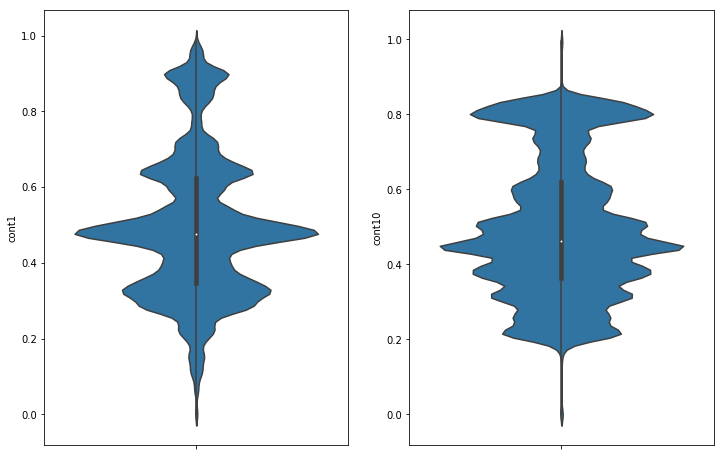

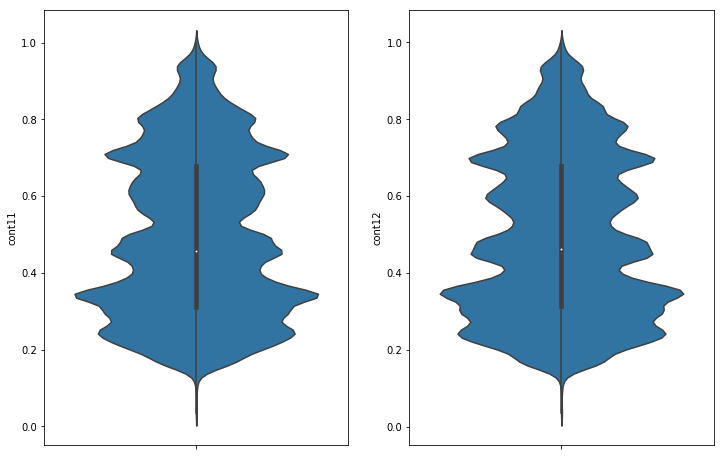

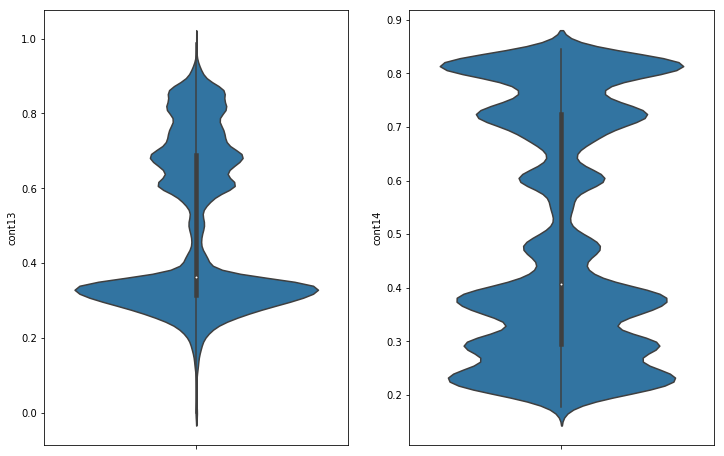

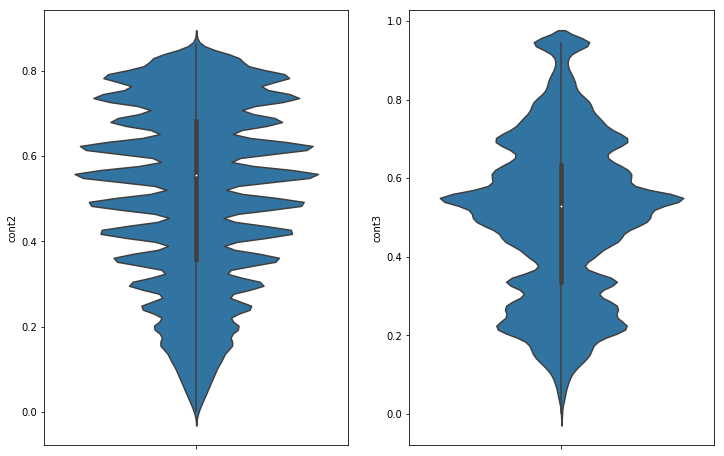

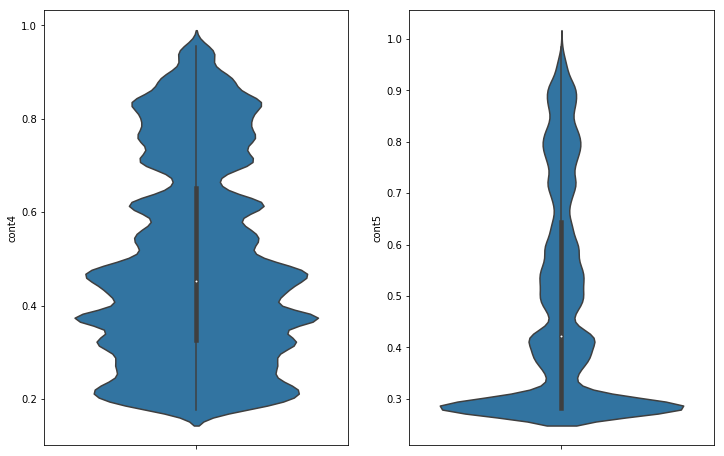

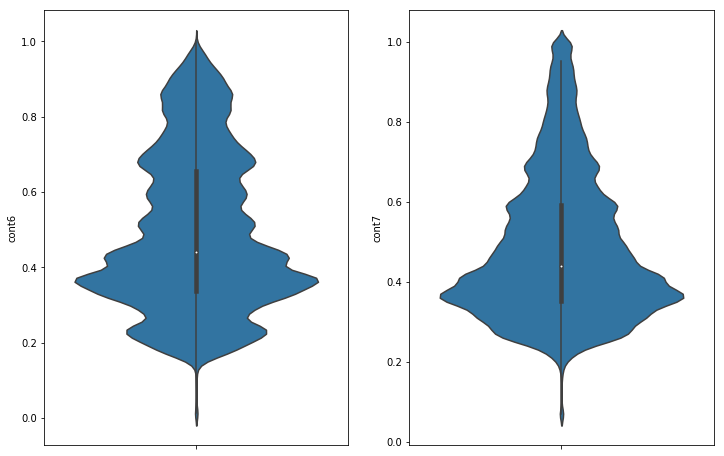

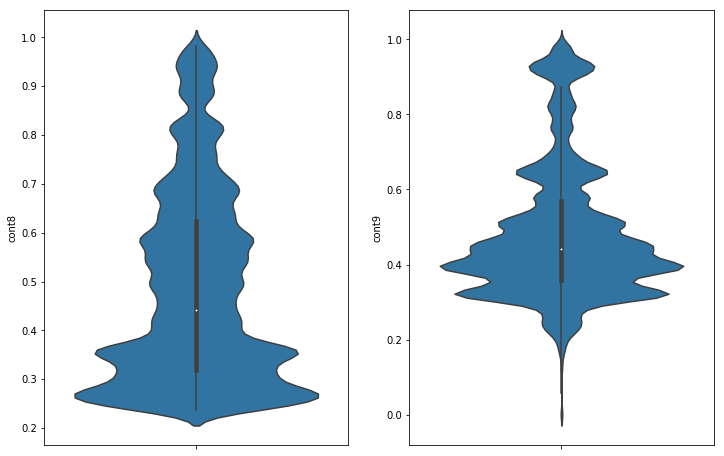

In [48]:
cols=data_cont.columns
n_cols=2
n_rows=7

for i in range(n_rows):
    fg,ax=plt.subplots(nrows=1,ncols=n_cols,figsize=(12,8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j],data=data_cont,ax=ax[j])

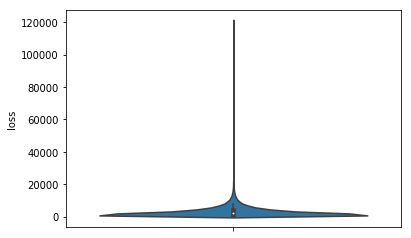

In [49]:
sns.violinplot(data=data,y="loss")

# Data transformation

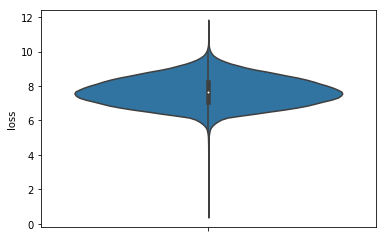

In [50]:
#skew correction
#log1p function applies log(1+x) to all elements of the column
data["loss"]=np.log1p(data["loss"])
sns.violinplot(data=data,y="loss")
plt.show()

# data interaction (correlation)

In [51]:
# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, ignore categorical data

# Calculates pearson co-efficient for all combinations

size=15
threshold=0.5
data_corr=data.corr()
corr_list=[]

for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))


cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont10 and cont6 = 0.88
cont13 and cont6 = 0.81
cont1 and cont10 = 0.81
cont6 and cont9 = 0.80
cont12 and cont6 = 0.79
cont10 and cont9 = 0.79
cont11 and cont6 = 0.77
cont1 and cont6 = 0.76
cont11 and cont7 = 0.75
cont12 and cont7 = 0.74
cont10 and cont12 = 0.72
cont10 and cont13 = 0.71
cont10 and cont11 = 0.70
cont6 and cont7 = 0.66
cont13 and cont9 = 0.64
cont12 and cont9 = 0.63
cont1 and cont12 = 0.61
cont11 and cont9 = 0.61
cont1 and cont11 = 0.60
cont1 and cont13 = 0.53
cont4 and cont8 = 0.53


## Scatter plot

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


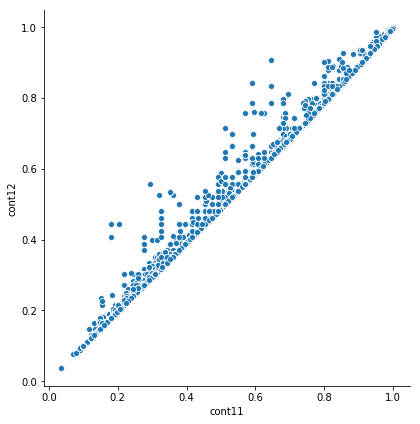

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


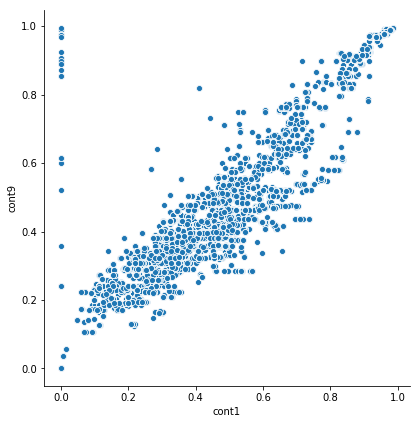

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


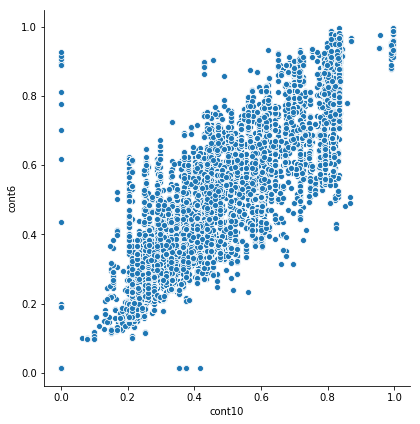

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


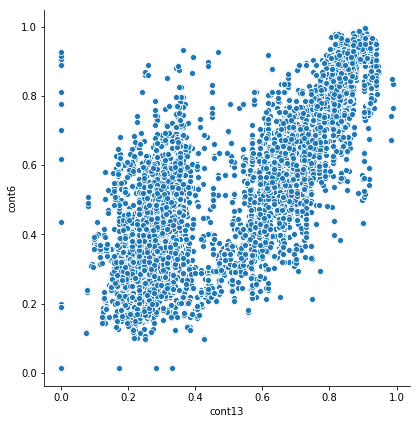

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


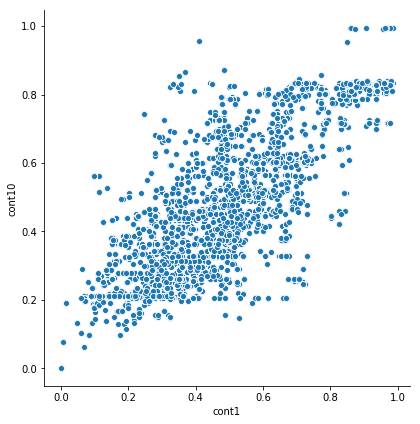

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


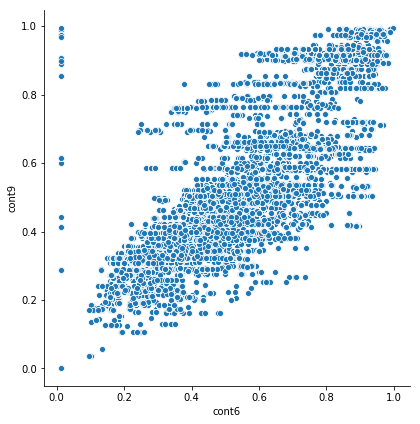

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


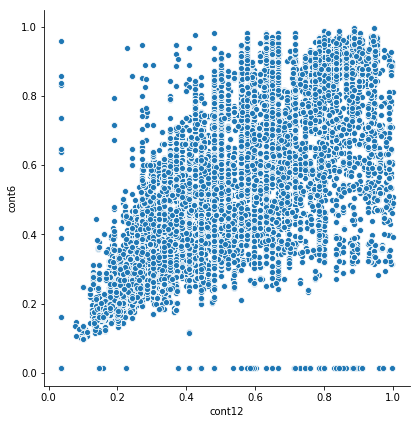

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


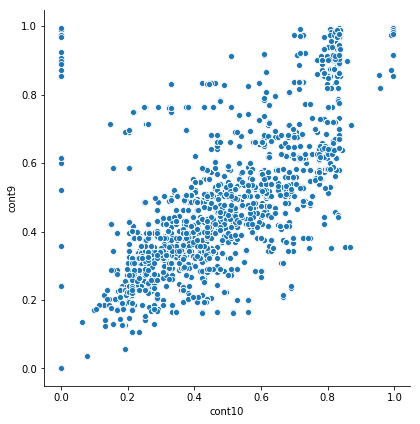

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


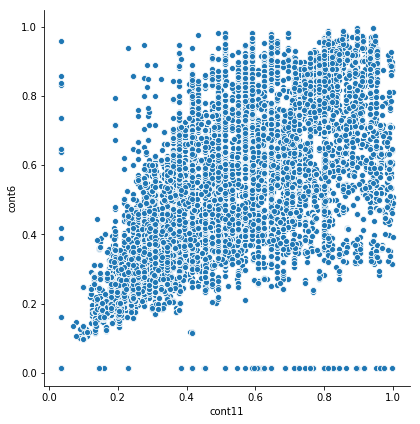

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


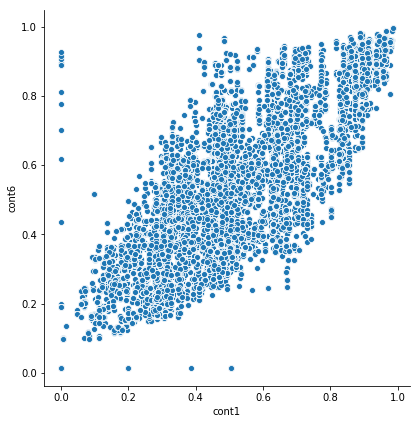

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


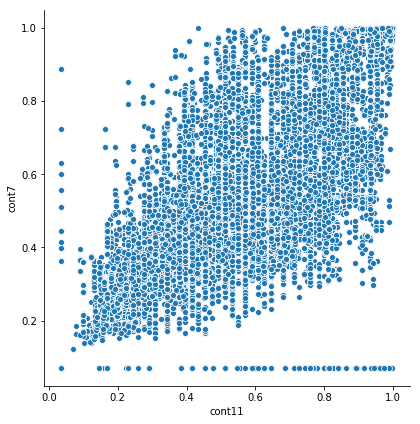

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


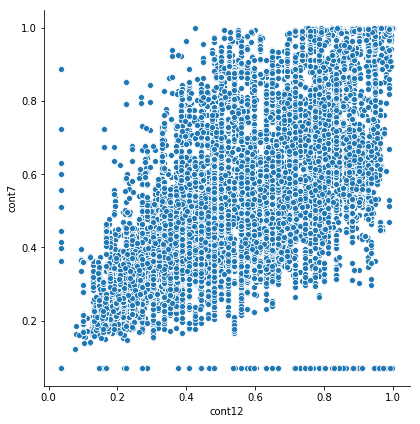

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


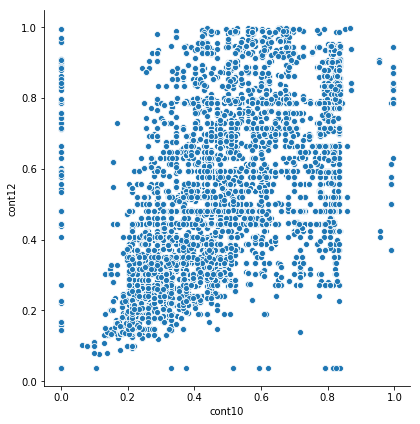

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


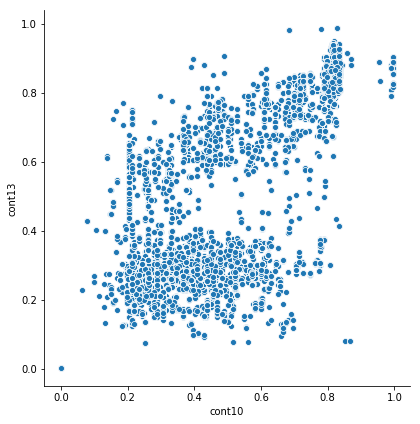

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


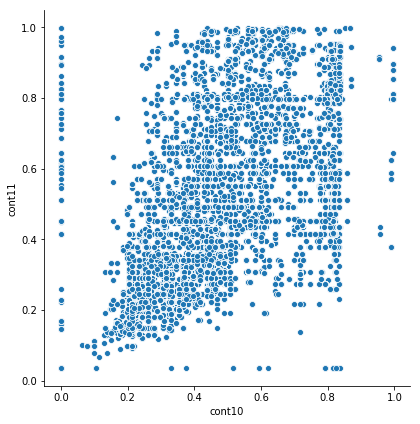

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


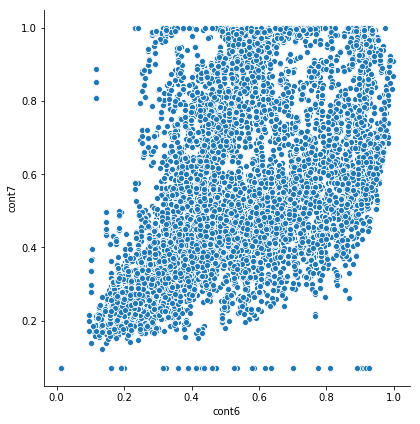

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


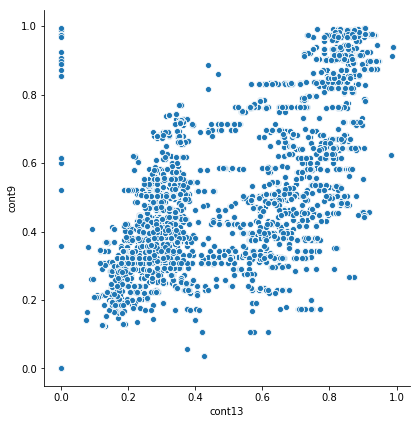

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


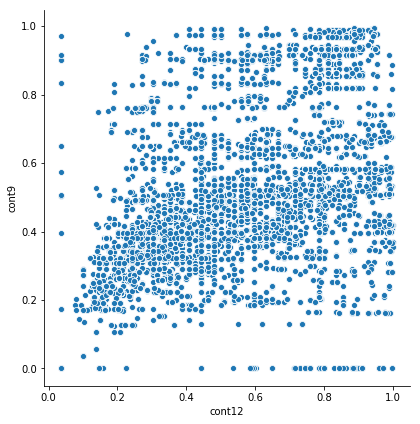

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


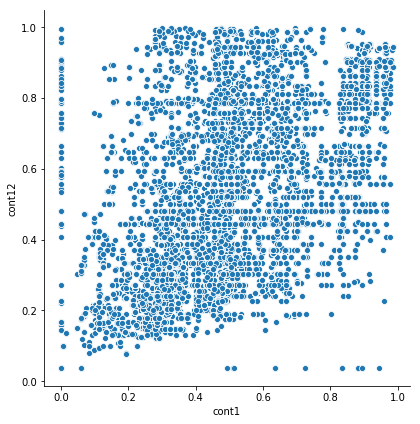

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


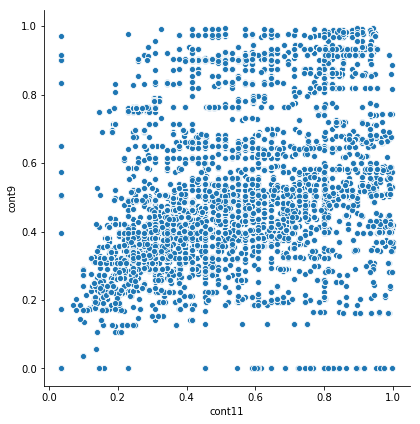

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


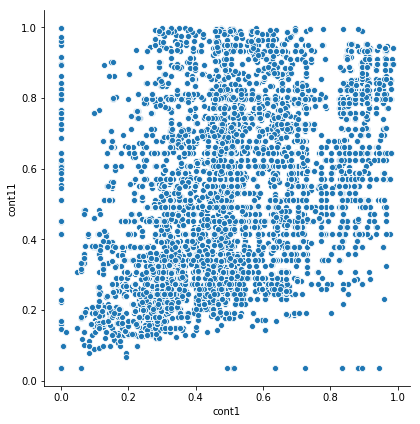

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


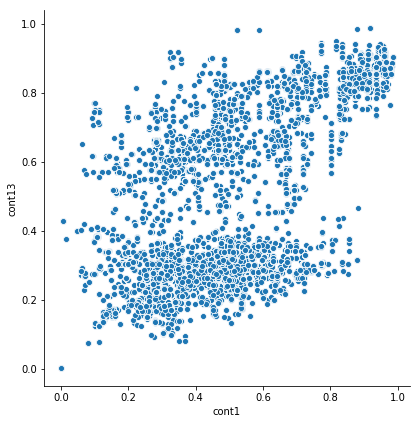

C:\Users\v9022828\AppData\Local\conda\conda\envs\Imagebox\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


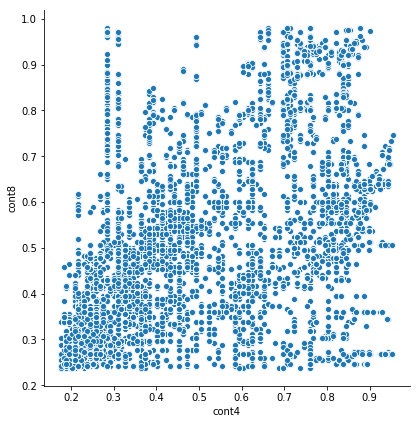

In [52]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(dataset, size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

## Visualize categorical data

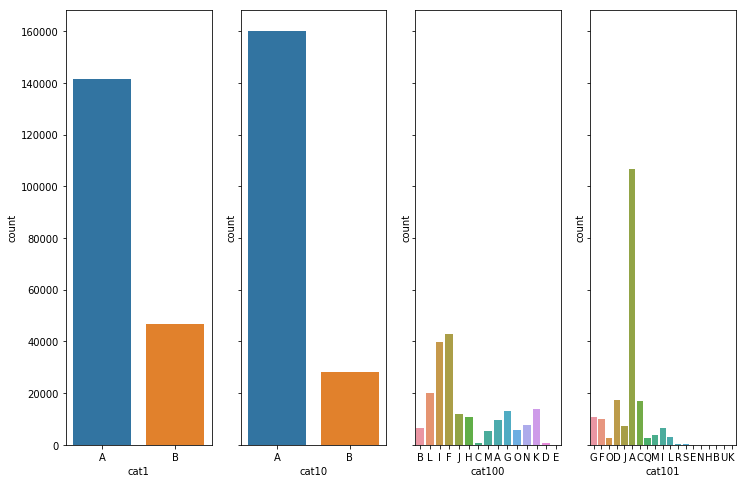

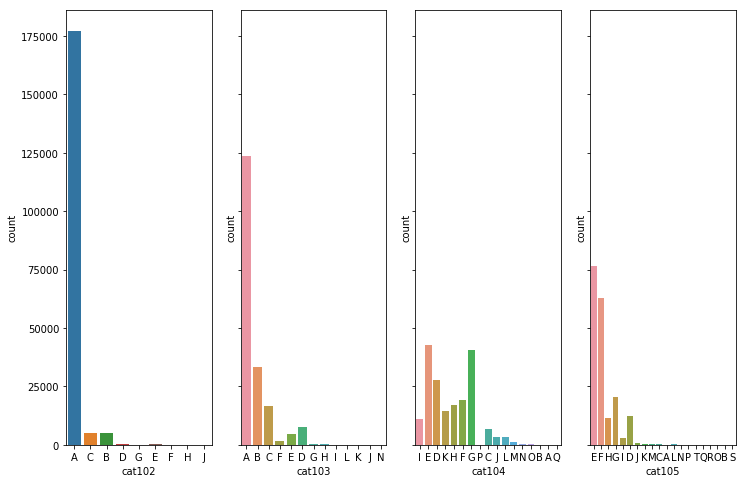

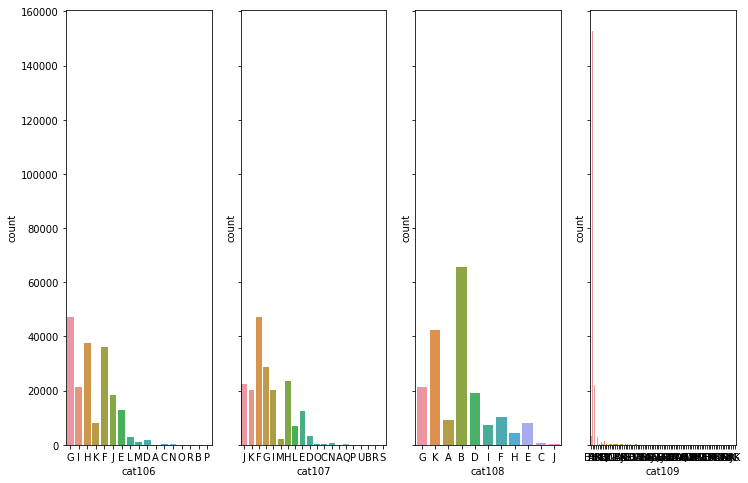

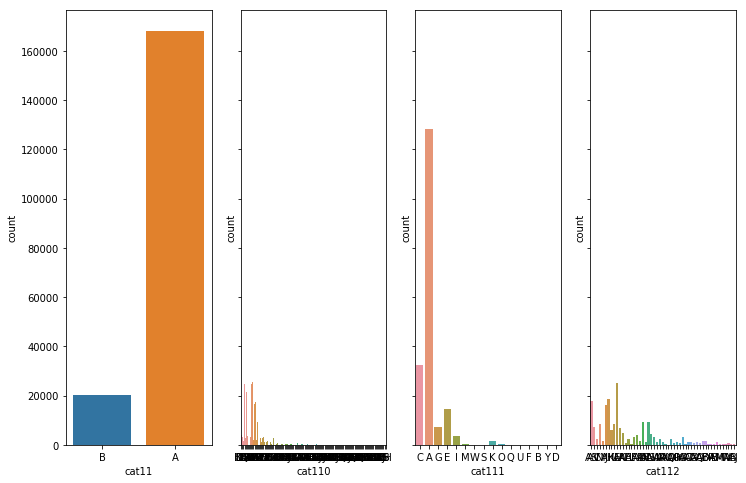

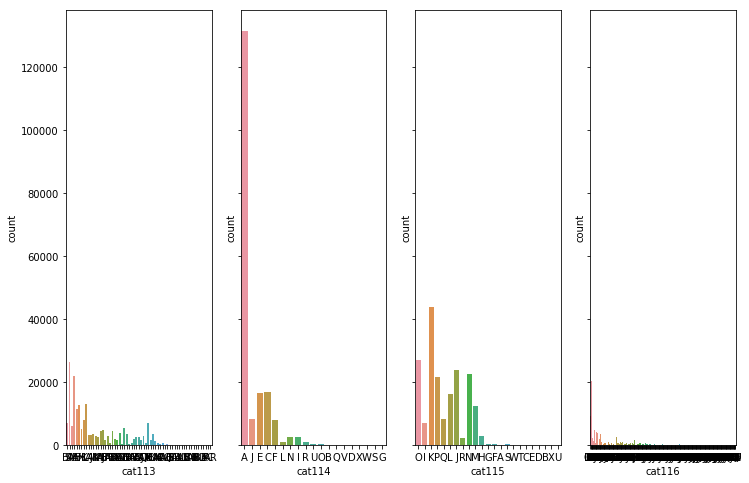

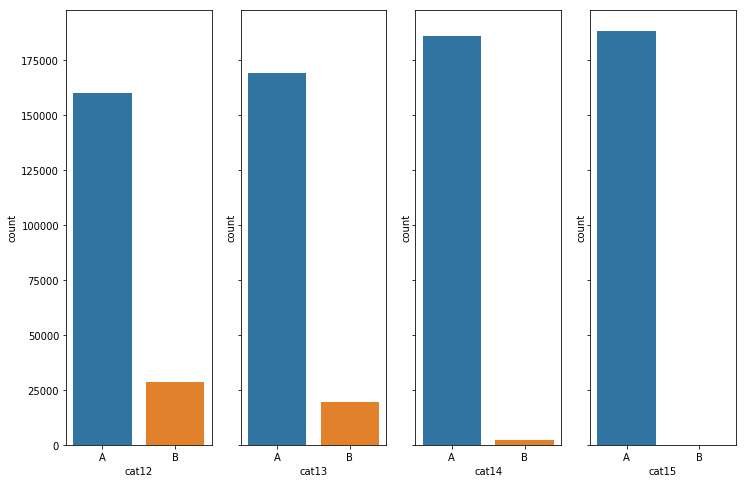

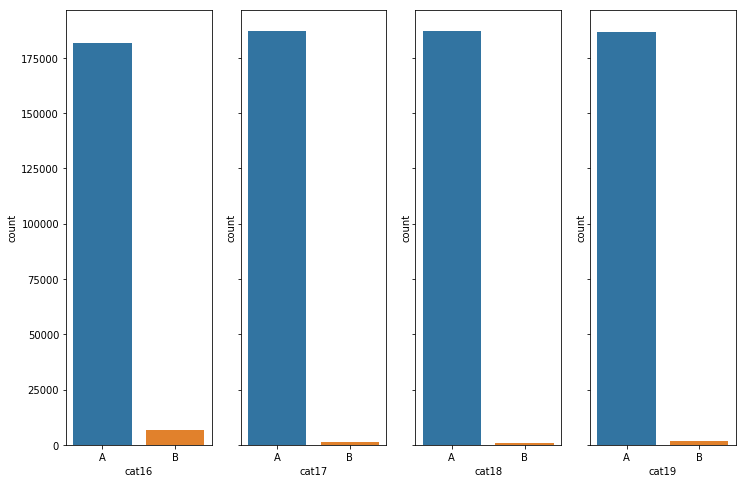

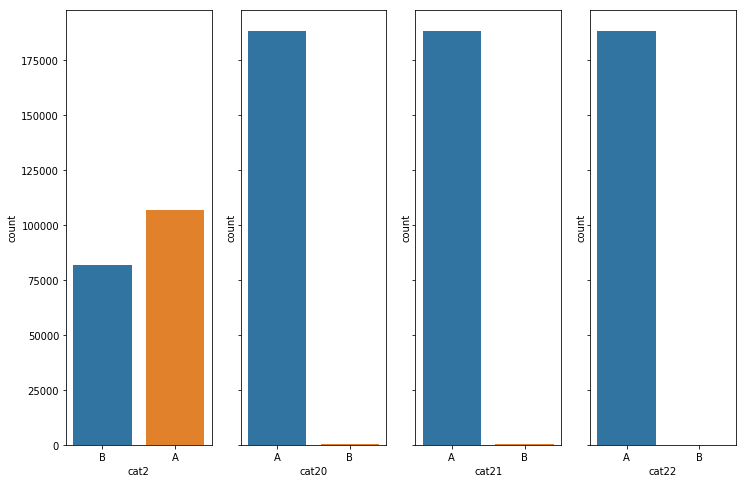

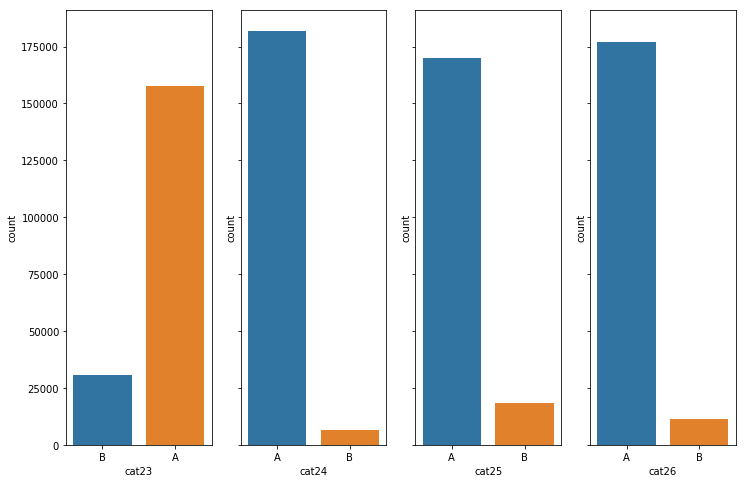

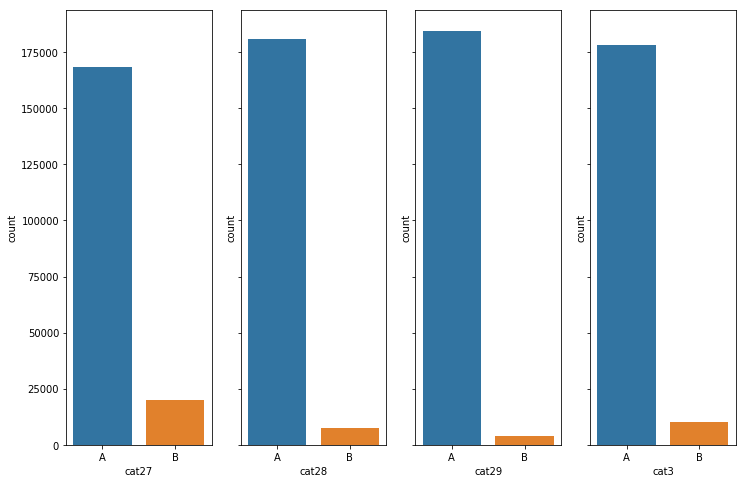

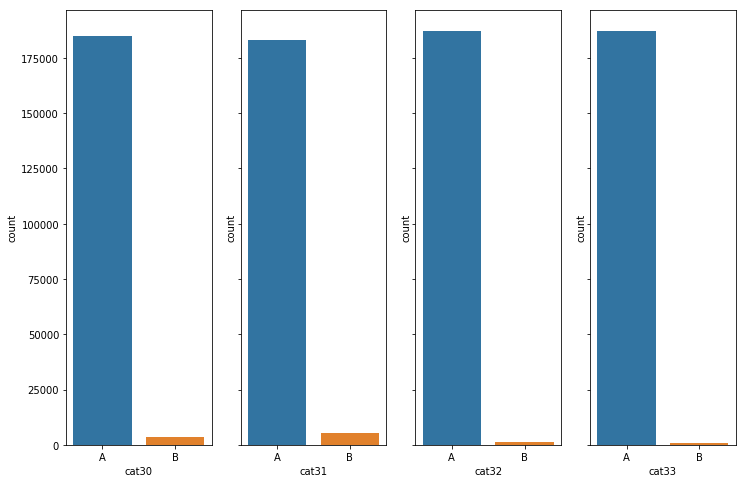

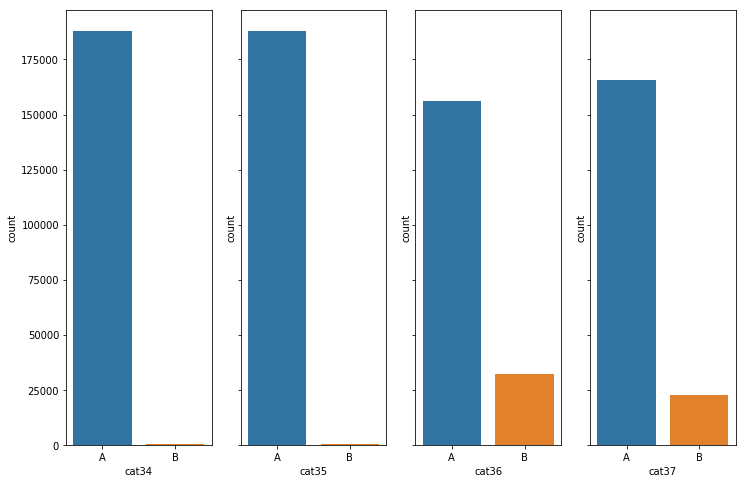

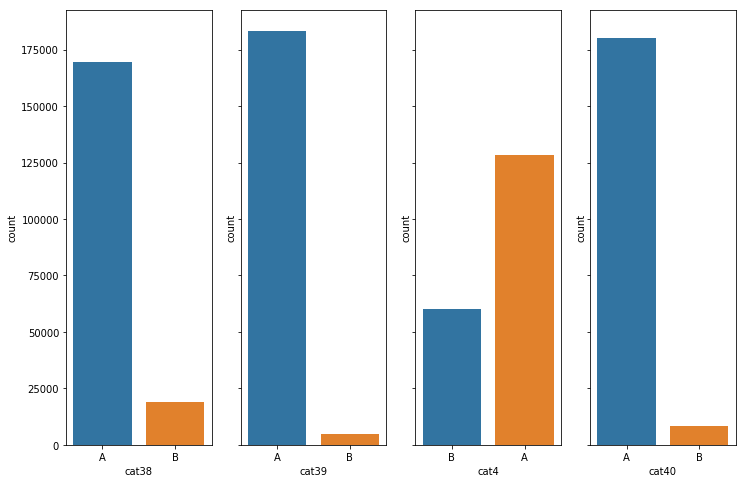

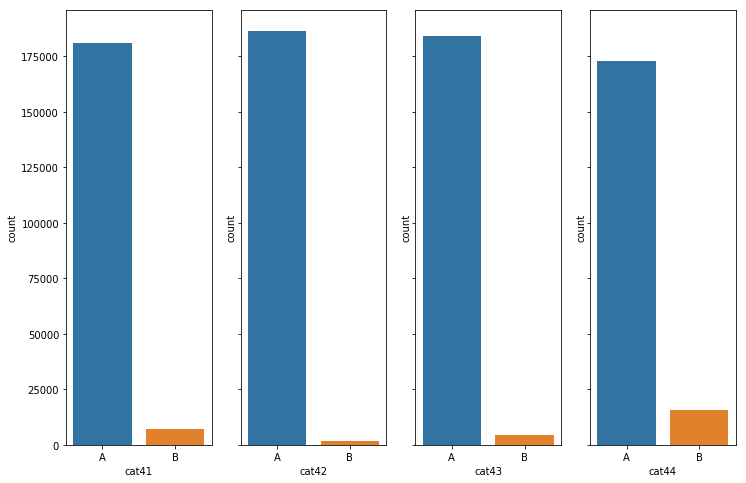

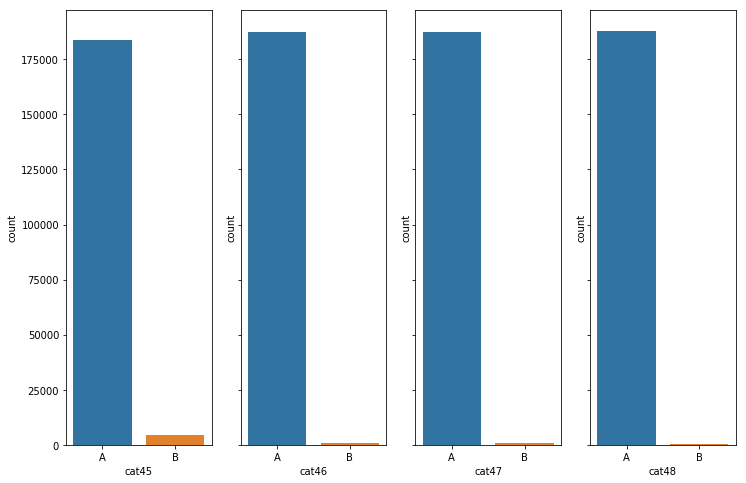

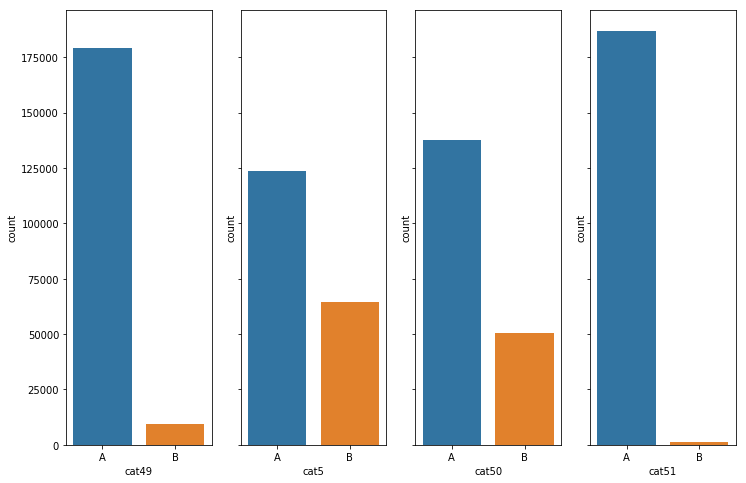

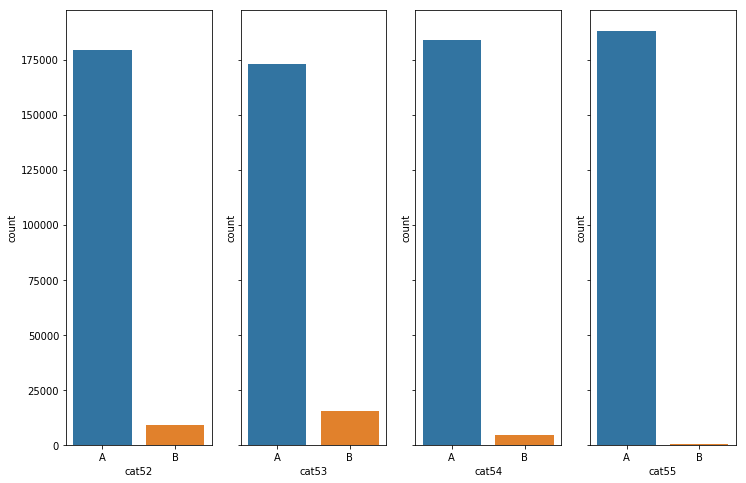

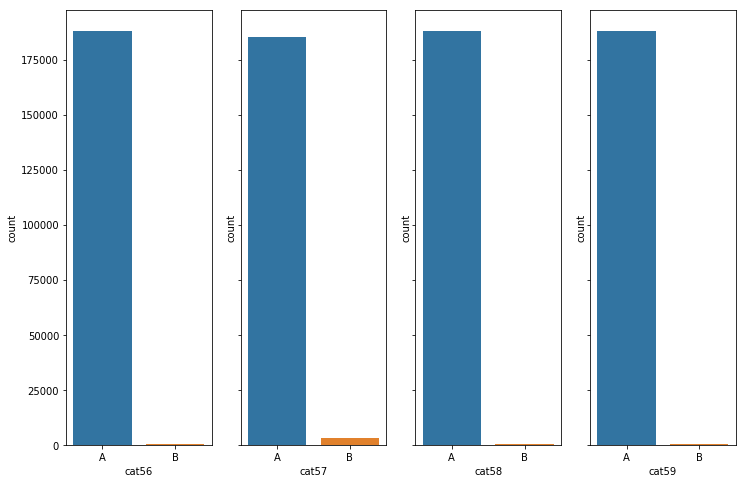

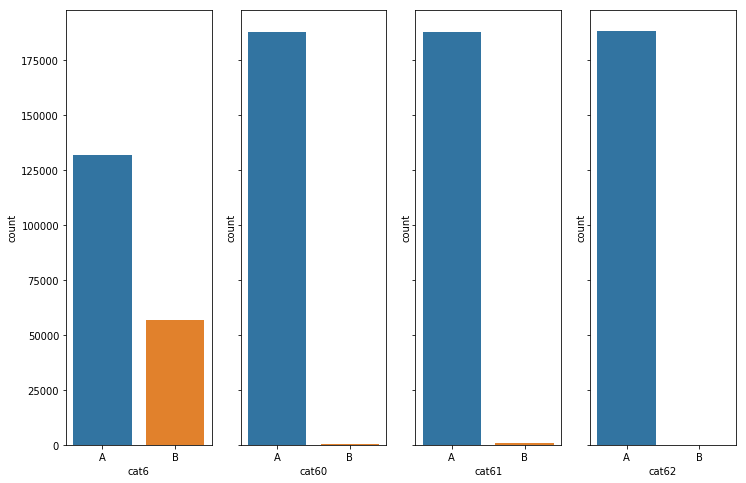

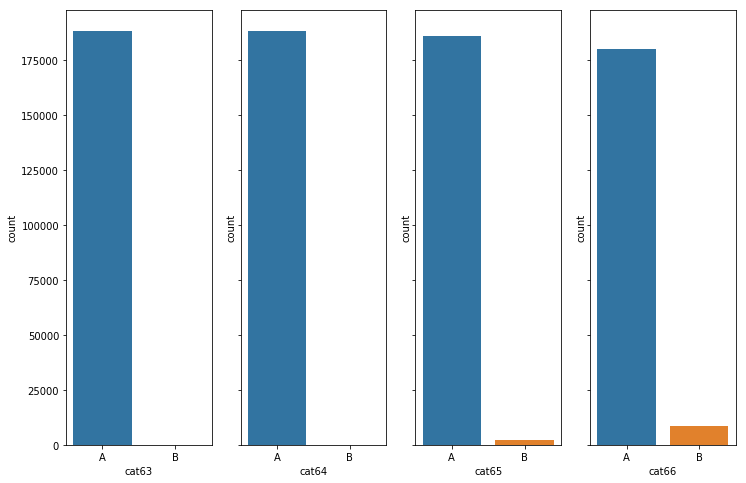

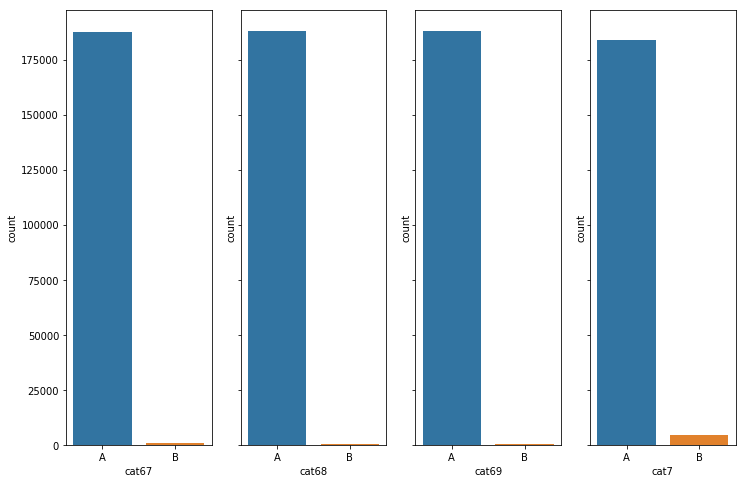

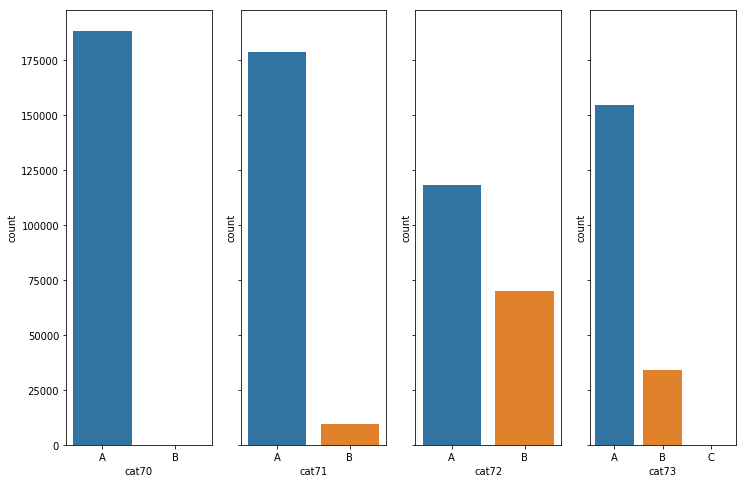

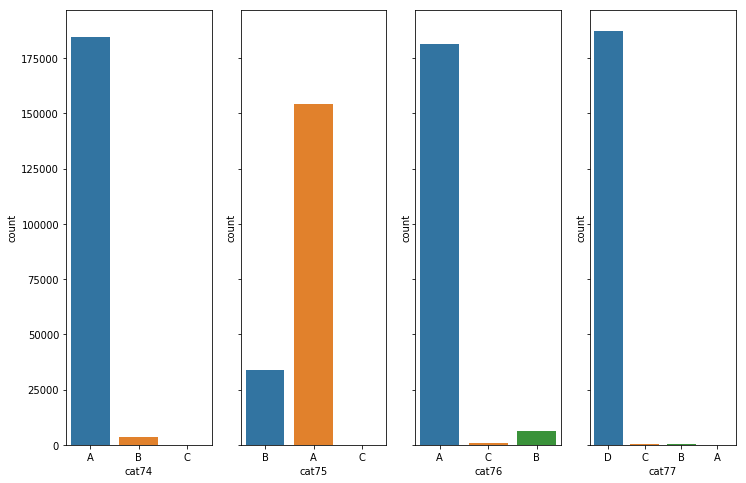

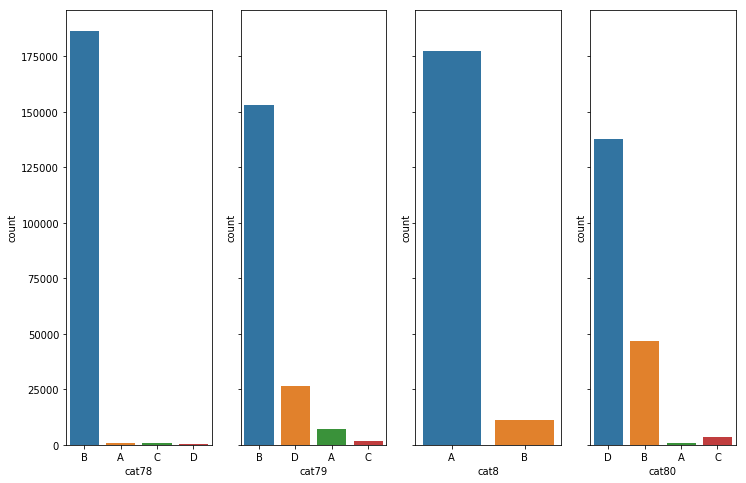

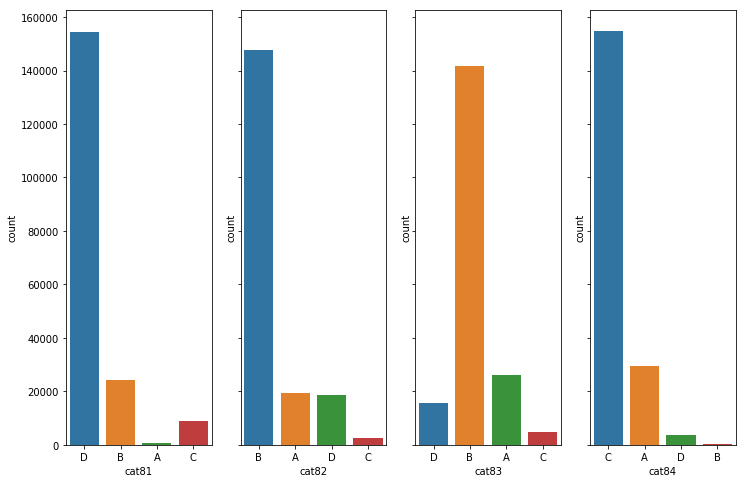

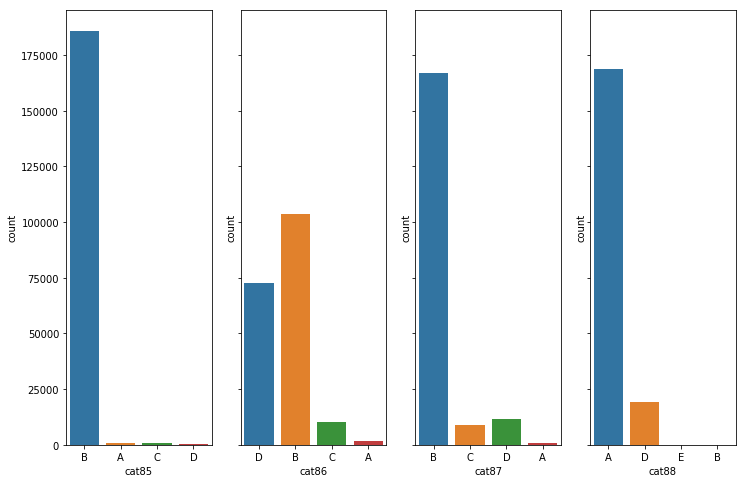

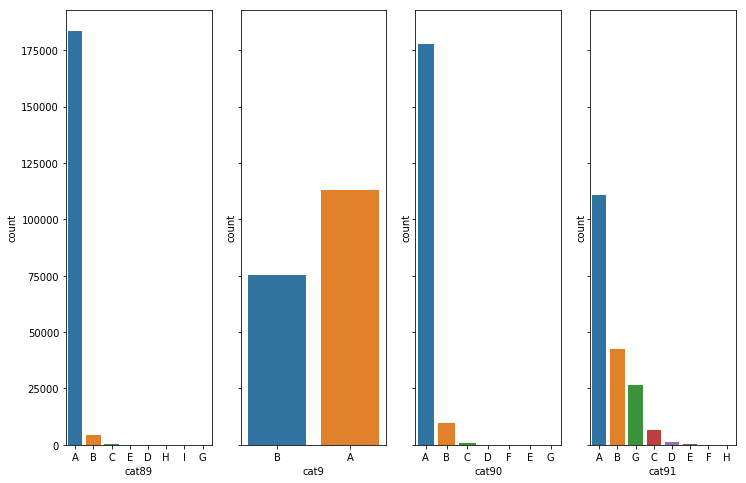

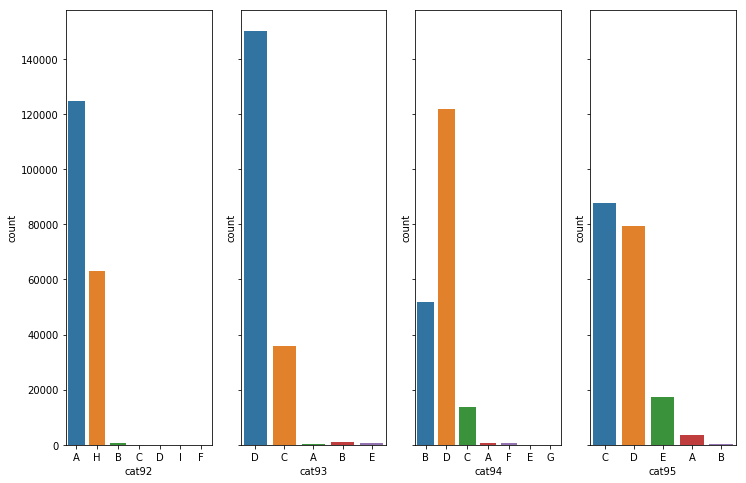

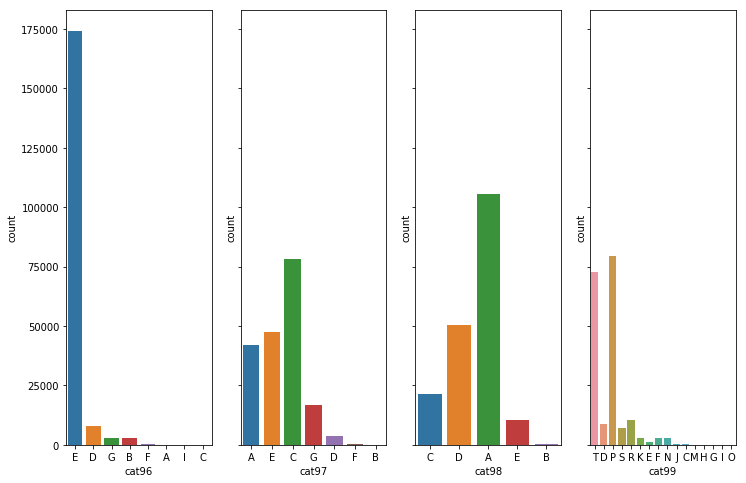

In [55]:
cols=data.columns

n_cols=4
n_rows=29

for i in range(n_rows):
    fg,ax=plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12,8))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=dataset, ax=ax[j])


## Method 1 to convert categorical object varible to usable format. (Label encoder + OHE)

In [60]:
labels=[]
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [65]:
df_obj = data.select_dtypes(include=[np.object])
df_obj.head()
df_obj.drop('source',axis=1,inplace=True)

In [92]:
## Encode the object variables
mylist=data.select_dtypes(include=['object']).columns.values.tolist() #list of column names with object type
mylist.remove('source')
mylist

['cat1',
 'cat10',
 'cat100',
 'cat101',
 'cat102',
 'cat103',
 'cat104',
 'cat105',
 'cat106',
 'cat107',
 'cat108',
 'cat109',
 'cat11',
 'cat110',
 'cat111',
 'cat112',
 'cat113',
 'cat114',
 'cat115',
 'cat116',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat2',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat3',
 'cat30',
 'cat31',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat4',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat5',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat6',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat7',
 'cat70',
 'cat71',
 'cat72',
 'cat73',
 'cat74',
 'cat75',
 'cat76',
 'cat77',
 'cat78',
 'cat79',
 'cat8',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 

In [93]:
data1=data.copy()

In [96]:
data.head()

,cat1,cat10,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,loss,source
0,A,A,B,G,A,A,I,E,G,J,...,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,7.702637,train
1,A,B,L,F,A,A,E,E,I,K,...,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,7.158203,train
2,A,B,L,O,A,B,E,F,H,F,...,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,8.008396,train
3,B,A,I,D,A,A,E,E,I,K,...,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,6.846784,train
4,A,B,F,J,A,A,D,E,K,G,...,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,7.924742,train


In [94]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
var_to_encode = mylist

for col in var_to_encode:
    data1[col]=le.fit_transform(data1[col])

In [98]:
data1.shape#converted to integer variable.. Now do dummies or OHE

(313864, 132)

In [ ]:
#Now data_mod3 is having int64 after labelencoder. Next step to convert this label to OHE (skip for now: takes RAM)
data1=pd.get_dummies(data1,columns=var_to_encode)
data1.shape